In [2]:
import time
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
terror_df = pd.read_csv('/content/drive/My Drive/BaseForAnalysis_Version2.csv', sep=',', encoding="ISO-8859-1")


In [6]:
terror_df.head(10)

,Unnamed: 0,eventid,year,month,day,extended,country,region,city,latitude,longitude,vicinity,crit,multiple,success,suicide,attacktype,targettype,nationality,organisation,nperps,claimedresp,weapontype,nkilled,nkillonlyter,nwounded,propdamageextent,victimkidnapped,ransomdemanded,nreleased,ncasualties
0,0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,1,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0
1,1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,1,0,1,0,Assassination,Journalists & Media,United States,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0
2,2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,1,0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,1,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0,1,0,1,0,Armed Assault,Police,United States,Black Nationalists,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
5,5,197001050001,1970,1,1,0,United States,North America,Baraboo,43.468500,-89.744299,0,1,0,0,0,Bombing/Explosion,Military,United States,"Weather Underground, Weathermen",NaN,NaN,Explosives,0.0,NaN,0.0,Minor,0.0,0.0,NaN,0.0
6,6,197001020001,1970,1,2,0,Uruguay,South America,Montevideo,-34.891151,-56.187214,0,1,0,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),3.0,NaN,Firearms,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
7,7,197001020002,1970,1,2,0,United States,North America,Oakland,37.791927,-122.225906,0,1,0,1,0,Bombing/Explosion,Utilities,United States,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
8,8,197001020003,1970,1,2,0,United States,North America,Madison,43.076592,-89.412488,0,1,0,1,0,Facility/Infrastructure Attack,Military,United States,New Year's Gang,1.0,1.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
9,9,197001030001,1970,1,3,0,United States,North America,Madison,43.072950,-89.386694,0,1,0,1,0,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,1.0,0.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0


In [7]:
terror_df.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'extended', 'country',
       'region', 'city', 'latitude', 'longitude', 'vicinity', 'crit',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype',
       'nationality', 'organisation', 'nperps', 'claimedresp', 'weapontype',
       'nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent',
       'victimkidnapped', 'ransomdemanded', 'nreleased', 'ncasualties'],
      dtype='object')

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

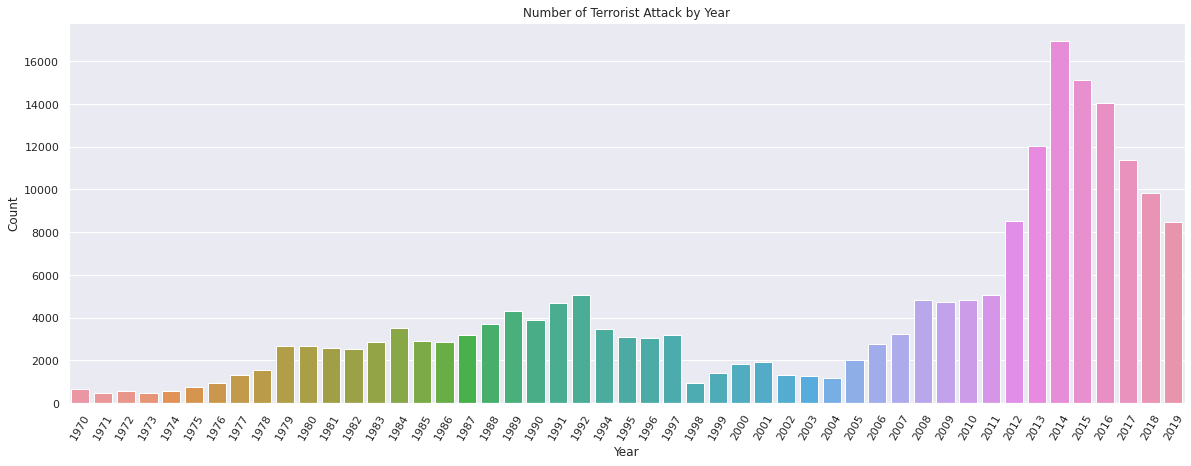

In [8]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
year_count = sns.countplot(x = 'year', data = terror_df)
year_count.set_xticklabels(year_count.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

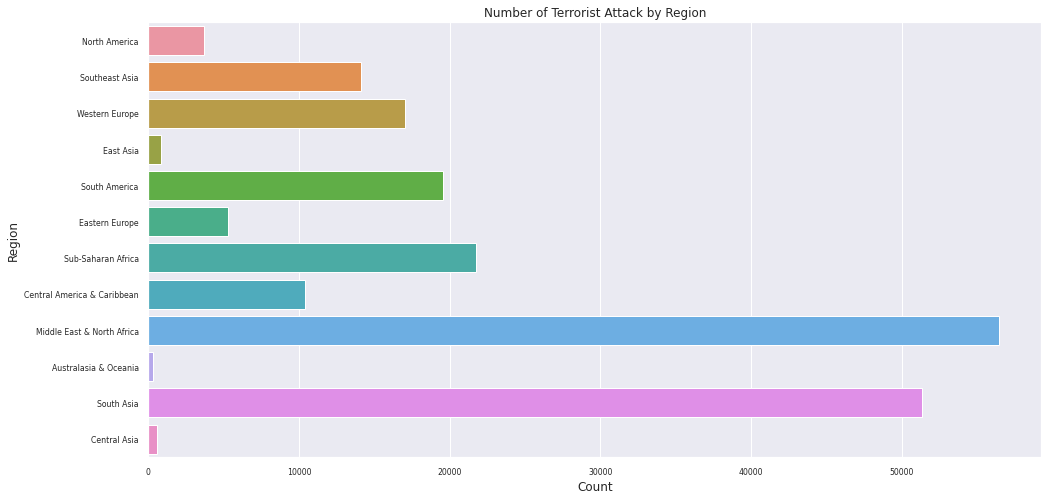

In [13]:
f = plt.figure(figsize=(16, 8))

sns.set(font_scale=0.7)
sns.countplot(y='region', data=terror_df)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Terrorist Attack by Region', fontsize=12)

Text(0.5, 1.0, 'Types of Terrorist Attack ')

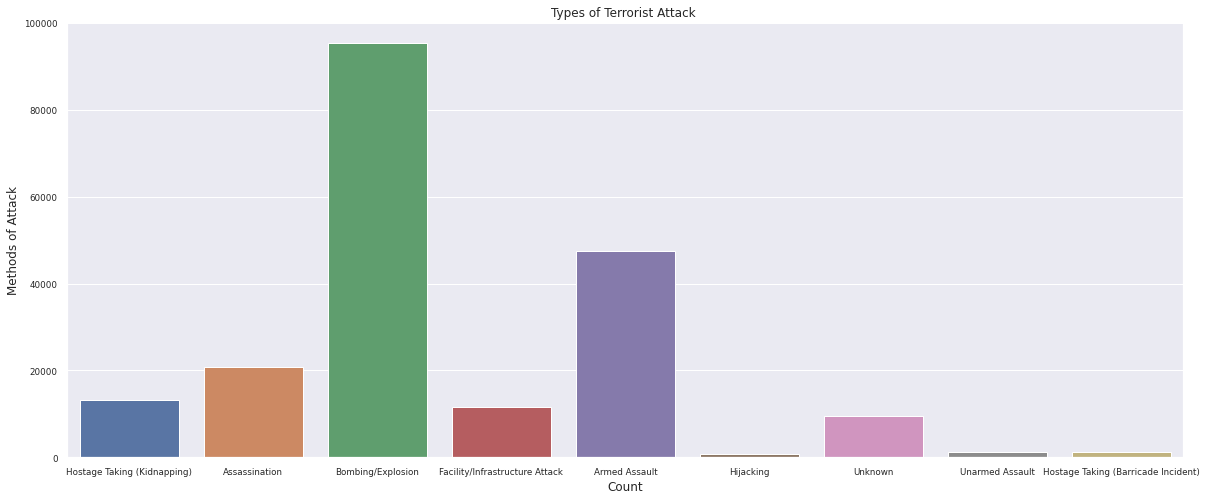

In [22]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
year_count = sns.countplot(x='attacktype', data=terror_df,)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Methods of Attack', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)

Text(0.5, 1.0, 'Types of Target')

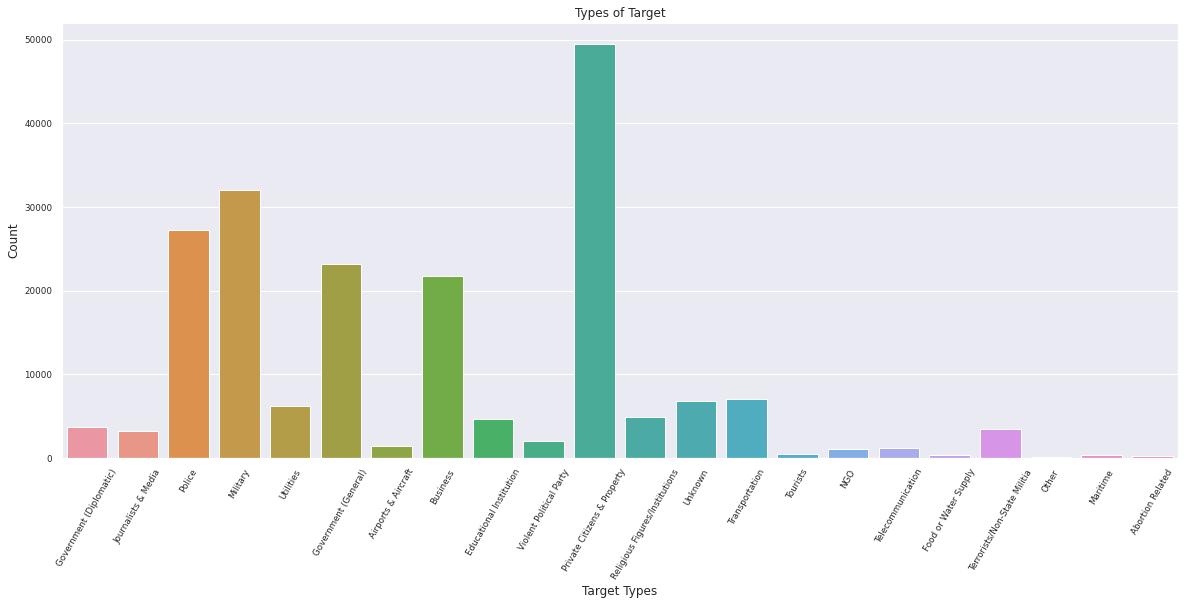

In [27]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
xaxis = sns.countplot(x='targettype', data=terror_df,)
xaxis.set_xticklabels(year_count.get_xticklabels(), rotation=60)
plt.xlabel('Target Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Types of Target', fontsize=12)